## Evaluating Factors Influencing PISA Test Reading Scores ##

## PISA(Program for International Student Assessment) Dataset

## Dataset Overview:

The dataset includes multiple features related to students' backgrounds and their performance in reading assessments. Below are the key variables in the dataset:

, on a 1000-point scale.r yes, 0 for no).n

# Columns Overview:


# Student-level Variables:


grade, male, raceeth, preschool, expectBachelors, selfBornUS, motherBornUS, fatherBornUS, englishAtHome, read30MinsADay, minutesPerWeekEnglish


# Parent-level Variables:


motherHS, motherBachelors, motherWork, fatherHS, fatherBachelors, fatherWork

# School-level Variables:

studentsInEnglish, schoolHasLibrary, publicSchool, urban, schoolSize, computerForSchoolwork


# Target Variable:


readingScore (target variable)



# Importing Libraries

In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Loading and Preprocessing 

In [24]:
df = pd.read_csv("C:/Users/aswin/OneDrive/Desktop/python/Oeson/PISA_Project/pisa2009test.csv")
df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   male                   1570 non-null   int64  
 2   raceeth                1557 non-null   object 
 3   preschool              1549 non-null   float64
 4   expectBachelors        1547 non-null   float64
 5   motherHS               1525 non-null   float64
 6   motherBachelors        1382 non-null   float64
 7   motherWork             1534 non-null   float64
 8   fatherHS               1445 non-null   float64
 9   fatherBachelors        1282 non-null   float64
 10  fatherWork             1457 non-null   float64
 11  selfBornUS             1546 non-null   float64
 12  motherBornUS           1547 non-null   float64
 13  fatherBornUS           1512 non-null   float64
 14  englishAtHome          1543 non-null   float64
 15  comp

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
grade,1570.0,10.094268,0.548507,9.00,10.00,10.000,10.0000,12.00
male,1570.0,0.519108,0.499794,0.00,0.00,1.000,1.0000,1.00
preschool,1549.0,0.710781,0.453546,0.00,0.00,1.000,1.0000,1.00
expectBachelors,1547.0,0.767292,0.422695,0.00,1.00,1.000,1.0000,1.00
motherHS,1525.0,0.868197,0.338388,0.00,1.00,1.000,1.0000,1.00
motherBachelors,1382.0,0.330680,0.470628,0.00,0.00,0.000,1.0000,1.00
motherWork,1534.0,0.719035,0.449617,0.00,0.00,1.000,1.0000,1.00
fatherHS,1445.0,0.848443,0.358715,0.00,1.00,1.000,1.0000,1.00
fatherBachelors,1282.0,0.325273,0.468660,0.00,0.00,0.000,1.0000,1.00
fatherWork,1457.0,0.843514,0.363440,0.00,1.00,1.000,1.0000,1.00


In [22]:
df.isnull().sum()

grade                      0
male                       0
raceeth                   13
preschool                 21
expectBachelors           23
motherHS                  45
motherBachelors          188
motherWork                36
fatherHS                 125
fatherBachelors          288
fatherWork               113
selfBornUS                24
motherBornUS              23
fatherBornUS              58
englishAtHome             27
computerForSchoolwork     30
read30MinsADay            21
minutesPerWeekEnglish    103
studentsInEnglish        114
schoolHasLibrary          58
publicSchool               0
urban                      0
schoolSize                69
readingScore               0
dtype: int64

In [26]:
df.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

In [32]:
# Descriptive statistics for categorical variables (e.g., readingScore)
print(df['readingScore'].value_counts())

readingScore
611.89    4
541.18    3
467.26    3
412.59    3
488.78    3
         ..
304.45    1
431.11    1
523.25    1
554.81    1
577.43    1
Name: count, Length: 1392, dtype: int64


# 3. Data Visualization

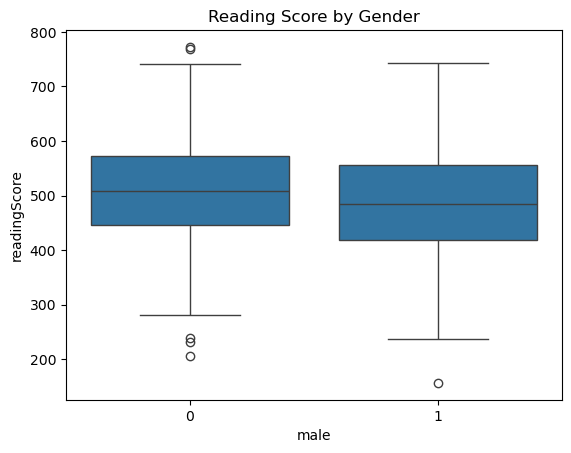

In [28]:
# Box plot: Reading score by gender
sns.boxplot(x='male', y='readingScore', data=df)
plt.title('Reading Score by Gender')
plt.show()

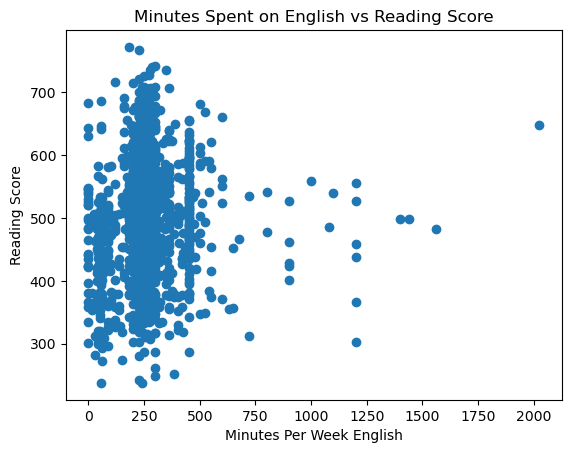

In [30]:
# Scatter plot: Minutes spent on English vs Reading score
plt.scatter(df['minutesPerWeekEnglish'], df['readingScore'])
plt.xlabel('Minutes Per Week English')
plt.ylabel('Reading Score')
plt.title('Minutes Spent on English vs Reading Score')
plt.show()

C:\Users\aswin\AppData\Local\Temp\ipykernel_5604\3913198784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="grade",palette="Paired")


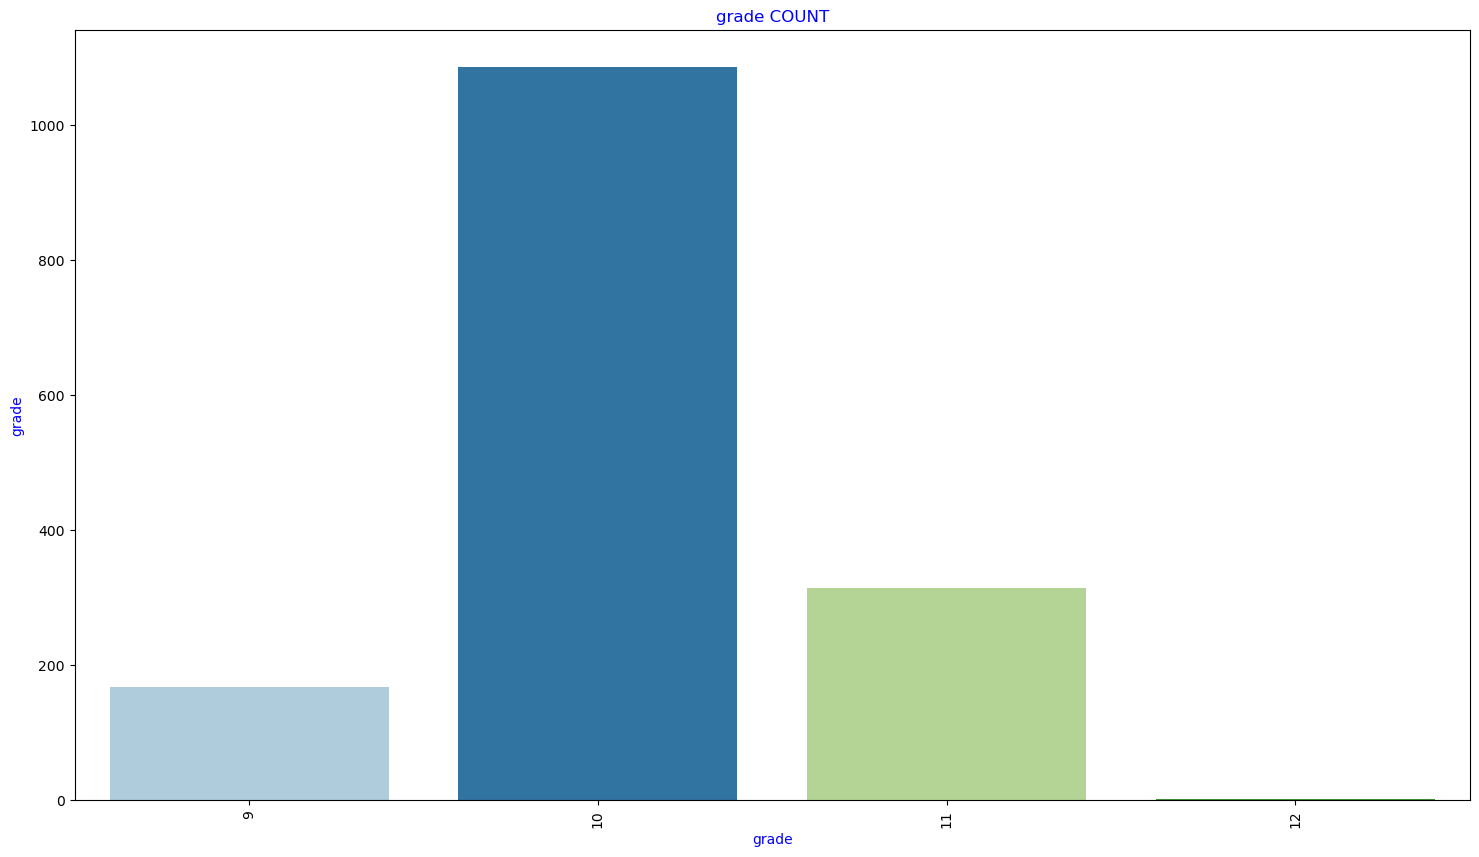

In [24]:
plt.figure(figsize = (18,10))
sns.countplot(data=df,x="grade",palette="Paired")
plt.xticks(rotation=90)
plt.xlabel("grade",fontsize=10,color="blue")
plt.ylabel("grade",fontsize=10,color="blue")
plt.title("grade COUNT",color="blue")
plt.show()

In [32]:

# 1. Descriptive Statistics for Numerical Columns
numerical_columns = ['readingScore', 'minutesPerWeekEnglish', 'schoolSize', 'studentsInEnglish']
numerical_stats = df[numerical_columns].describe()

print("Numerical Variables - Descriptive Statistics:")
print(numerical_stats)

# 2. Descriptive Statistics for Categorical Columns
categorical_columns = ['male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS', 'motherBachelors', 
                       'motherWork', 'fatherHS', 'fatherBachelors', 'fatherWork', 'selfBornUS', 'motherBornUS',
                       'fatherBornUS', 'englishAtHome', 'computerForSchoolwork', 'read30MinsADay', 'schoolHasLibrary', 
                       'publicSchool', 'urban']

# Frequency counts for categorical variables
for column in categorical_columns:
    print(f"\nFrequency counts for {column}:")
    print(df[column].value_counts())

# Mode for categorical columns (most common category)
categorical_modes = df[categorical_columns].mode().iloc[0]

print("\nMost common categories (Mode) for each categorical variable:")
print(categorical_modes)

# 3. Optional: Cross-tabulation of 'readingScore' against key categorical variables
# For example, comparing average reading scores by gender and preschool attendance
mean_reading_by_gender = df.groupby('male')['readingScore'].mean()
mean_reading_by_preschool = df.groupby('preschool')['readingScore'].mean()

print("\nMean Reading Score by Gender (1 = Male, 0 = Female):")
print(mean_reading_by_gender)

print("\nMean Reading Score by Preschool Attendance (1 = Attended Preschool, 0 = Did Not Attend):")
print(mean_reading_by_preschool)


Numerical Variables - Descriptive Statistics:
       readingScore  minutesPerWeekEnglish   schoolSize  studentsInEnglish
count   1570.000000            1467.000000  1501.000000        1456.000000
mean     496.846376             264.555556  1386.148568          24.701236
std       95.820388             152.413781   871.629257           7.034184
min      156.380000               0.000000   100.000000           1.000000
25%      430.470000             225.000000   762.000000          20.000000
50%      499.455000             250.000000  1273.000000          25.000000
75%      562.717500             300.000000  1900.000000          30.000000
max      772.460000            2025.000000  6694.000000          90.000000

Frequency counts for male:
male
1    815
0    755
Name: count, dtype: int64

Frequency counts for raceeth:
raceeth
White                                     879
Hispanic                                  350
Black                                     191
Asian                    

In [39]:
from scipy import stats

# Split data into groups (male = 1, female = 0)
male_scores = df[df['male'] == 1]['readingScore']
female_scores = df[df['male'] == 0]['readingScore']

# Conduct a t-test
t_stat, p_val = stats.ttest_ind(male_scores, female_scores)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -4.9939336341642155, P-value: 6.57705464358048e-07


# If p_val < 0.05, reject the null hypothesis, suggesting a significant difference in reading scores. so the p_val > 0.05

In [60]:
# Check for missing values in X and y
print("Missing values in X:\n", X.isnull().sum())
print("Missing values in y:", y.isnull().sum())

# Drop rows with missing values in X
X_clean = X.dropna()

# Align y with the cleaned X by using the same indices
y_clean = y.loc[X_clean.index]

# Optionally, reset the indices of both X_clean and y_clean to avoid any misalignment issues
X_clean = X_clean.reset_index(drop=True)
y_clean = y_clean.reset_index(drop=True)

# Re-run the regression model after handling missing data
model = sm.OLS(y_clean, X_clean).fit()

# Print the summary
print(model.summary())


Missing values in X:
 const                      0
male                       0
minutesPerWeekEnglish    103
motherHS                  45
fatherHS                 125
expectBachelors           23
dtype: int64
Missing values in y: 0
                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     54.90
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           5.62e-52
Time:                        20:30:35   Log-Likelihood:                -7868.0
No. Observations:                1344   AIC:                         1.575e+04
Df Residuals:                    1338   BIC:                         1.578e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                    

# 5. Regression Analysis

In [36]:
import statsmodels.api as sm

# Prepare the data
X = df[['male', 'minutesPerWeekEnglish', 'motherHS', 'fatherHS', 'expectBachelors']]  # Add more predictors as needed
y = df['readingScore']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


MissingDataError: exog contains inf or nans

In [71]:
# Check for missing and infinite values in X
print("Missing values in X before cleaning:\n", X.isnull().sum())
print("Inf values in X before cleaning:\n", np.isinf(X).sum())

# Option 1: Drop rows with missing or infinite values
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()  # Replace Inf with NaN, then drop
y_clean = y.loc[X_clean.index]  # Align y with X_clean

# Option 2: Impute missing and infinite values (for numerical columns)
X_clean = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())  # Impute mean for NaNs

# Optionally, fill missing categorical variables with the mode (for non-numeric columns)
for column in X.select_dtypes(include=['object', 'category']):
    X_clean[column].fillna(X[column].mode()[0], inplace=True)

# Re-run the regression model after handling missing/infinite data
X_clean = sm.add_constant(X_clean)  # Add constant to the model
model = sm.OLS(y_clean, X_clean).fit()

# Print the summary
print(model.summary())



Missing values in X before cleaning:
 const                      0
male                       0
minutesPerWeekEnglish    103
motherHS                  45
fatherHS                 125
expectBachelors           23
dtype: int64
Inf values in X before cleaning:
 const                    0
male                     0
minutesPerWeekEnglish    0
motherHS                 0
fatherHS                 0
expectBachelors          0
dtype: int64


ValueError: The indices for endog and exog are not aligned

# 6. Confidence Intervals

In [64]:
# Confidence intervals for the regression coefficients
conf_intervals = model.conf_int()
print("Confidence Intervals for the regression coefficients:\n", conf_intervals)


Confidence Intervals for the regression coefficients:
                                 0           1
const                  382.258344  417.969245
male                   -25.568027   -7.301853
minutesPerWeekEnglish    0.017144    0.077716
motherHS                 2.857950   35.204965
fatherHS                19.962259   49.919235
expectBachelors         59.681056   82.096652


Use the confidence intervals to check the range within which the true values of the coefficients are likely to lie. If the confidence interval for a predictor does not include 0, that predictor is likely significant.